Imports

In [7]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openai
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv

from GraderLLM import *

In [8]:
#Load Environment variables (API Keys for the 3 LLMs)
load_dotenv()

True

LLMs

In [ ]:
#Use the GraderLLM Wrapper Class (which contains functions that will build the test/rubric, do the grading,
#scoring, etc. tasks) to create an object for each of the 3 advanced reasoning LLMs we are testing
gemini_llm = GraderLLM("Gemeni 2.0 Flash Thinking", ChatGoogleGenerativeAI(model='gemini-2.0-flash-thinking-exp'))
claude_llm = GraderLLM("Claude Sonnet 3.5", ChatAnthropic(model="claude-3-5-sonnet-latest"))
gpt_llm = GraderLLM("ChatGPT o1-preview", ChatOpenAI(model_name = 'o1-preview', temperature = 1))

In [10]:
#put the GraderLLM objects in a list for 'for' loops
llms = [gemini_llm, claude_llm, gpt_llm]

<h2>Run #1</h2>

In [11]:
#Path to use to store each LLM's results, rubric, test, response to tests, etc for later examination
path = "data/run1"

In [12]:
#Go through the LLM list and have each build a test and rubric using GraderLLM functions
for llm in llms:
  llm.buildTestAndRubric()
  #Write the test and rubric to a test file to examine later (take a look at this, 
  # there are some really interesting questions they come up with)
  with open(f"{path}/{llm.name}/test.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.test)
  with open(f"{path}/{llm.name}/rubric.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.rubric)

Creating test for Gemeni 2.0 Flash Thinking:
Finished making test for Gemeni 2.0 Flash Thinking
All squares are rectangles. All rectangles are quadrilaterals. Is it true that all squares are quadrilaterals? Explain your reasoning.
If P implies Q, and Q implies R, does P imply R? Explain why or why not.
Premise 1: Every bird can fly. Premise 2: Penguins are birds. Conclusion: Penguins can fly. Is this conclusion logically valid? Explain.
The grass is wet. What are the most likely explanations for this?
The patient is presenting with a fever, cough, and fatigue. What are the possible diagnoses, and which is the most probable?
The lights are on in the house, but the car is not in the driveway. What could be happening?
If the Roman Empire had not fallen, how might the world be different today?
What if gravity suddenly reversed for five minutes? Describe the likely consequences.
Imagine you had the ability to teleport. How would your daily life change?
A heart is to a body as a ______ is to

In [ ]:
#nested for loop.  Each LLM will use its test and rubric to grade each other LLM and itself.
for grader in llms:
    for gradee in llms:
        grader.applyTest(gradee)
        #Save the response and score to text files for later examination
        with open(f"{path}/{gradee.name}/responses/{grader.name}/response.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['response'])
        with open(f"{path}/{gradee.name}/responses/{grader.name}/score.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['score'])


Gemeni 2.0 Flash Thinking is testing Gemeni 2.0 Flash Thinking
Gemeni 2.0 Flash Thinking is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing Claude Sonnet 3.5
Gemeni 2.0 Flash Thinking is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing ChatGPT o1-preview
Gemeni 2.0 Flash Thinking is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Gemeni 2.0 Flash Thinking
Claude Sonnet 3.5 is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Claude Sonnet 3.5
Claude Sonnet 3.5 is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing ChatGPT o1-preview
Claude Sonnet 3.5 is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
ChatGPT o1-preview is testing Gemeni 2.0 Flash Thinking
ChatGPT o1-preview is done testing Gemeni 2.0 Flas

In [15]:
#build a dictionary where the llm namaes are keys and the scores are values
all_llm_dict = {llm.name: llm.scores for llm in llms}

In [16]:
#We'll be building 2 pandas dfs
rows = []
rows_total = []

#One for totals (exam level)
for llm_name, exams_dict in all_llm_dict.items():
    for exam_name, exam_data in exams_dict.items():
        # TOTALS
        rows_total.append({
            "LLM": llm_name,
            "Exam": exam_name,
            "TotalScore": exam_data["score_total"],
            "OverallPercent": exam_data["score_percentage"]
        })
        
        #one for questions
        # QUESTION-LEVEL
        score_array = exam_data["score_array"]
        percent_by_q = exam_data["percent_by_q"]
        for i, (sc, pct) in enumerate(zip(score_array, percent_by_q), start=1):
            rows.append({
                "LLM": llm_name,
                "Exam": exam_name,
                "Question": i,
                "Score": sc,
                "Percent": pct
            })

#Create the dfs
df_questions_1 = pd.DataFrame(rows)
df_totals_1 = pd.DataFrame(rows_total)

In [17]:
#leave the orginal dfs and make copies to use for visualizations
df_questions = copy.copy(df_questions_1)
df_totals = copy.copy(df_totals_1)

In [ ]:
#examine the questions dataframe
df_questions.head()

,LLM,Exam,Question,Score,Percent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,1,5.0,100.0
1,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,2,5.0,100.0
2,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,3,5.0,100.0
3,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,4,5.0,100.0
4,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,5,5.0,100.0


In [19]:
#dxamine the totals dataframe
df_totals.head()

,LLM,Exam,TotalScore,OverallPercent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,180.0,97.297297
1,Gemeni 2.0 Flash Thinking,Claude Sonnet 3.5,968.0,80.666667
2,Gemeni 2.0 Flash Thinking,ChatGPT o1-preview,37.0,56.060606
3,Claude Sonnet 3.5,Gemeni 2.0 Flash Thinking,180.0,97.297297
4,Claude Sonnet 3.5,Claude Sonnet 3.5,921.0,76.750000


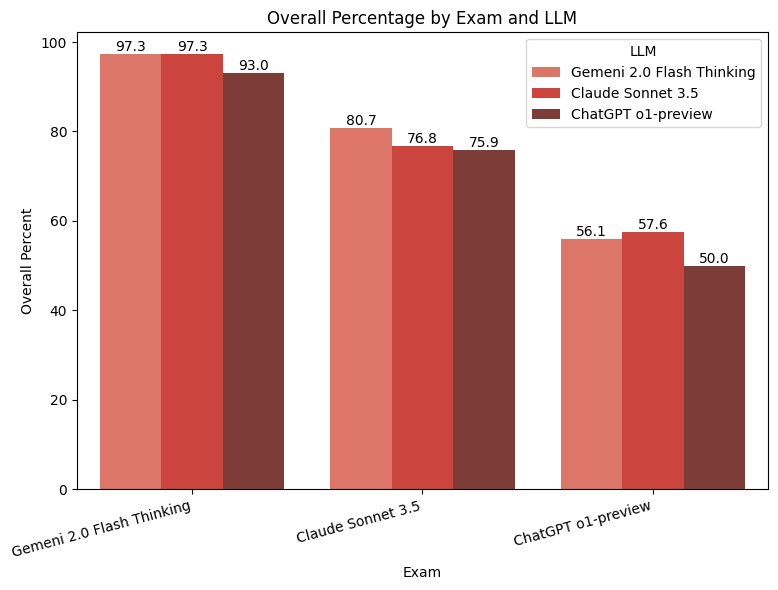

In [ ]:
#Visualize how each LLM performed on each exam
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_totals, x="Exam", y="OverallPercent", hue="LLM", palette="Reds_d")
plt.title("Overall Percentage by Exam and LLM")
plt.ylabel("Overall Percent")
plt.xlabel("Exam")
plt.xticks(rotation=15, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")
plt.tight_layout()
plt.show()

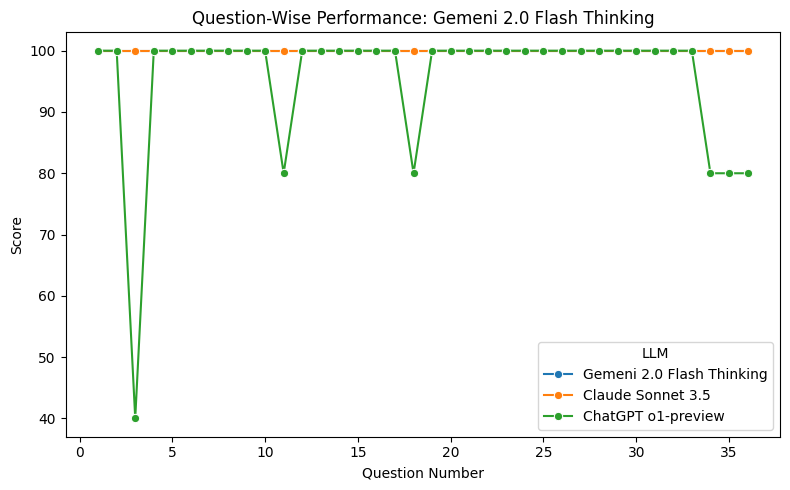

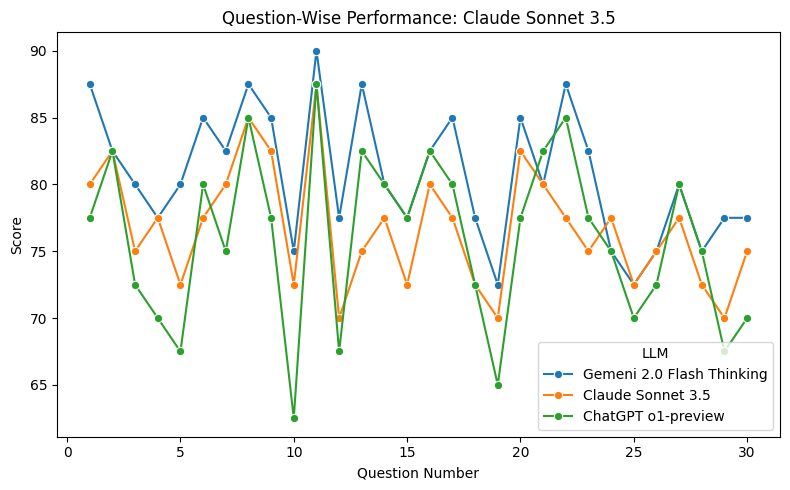

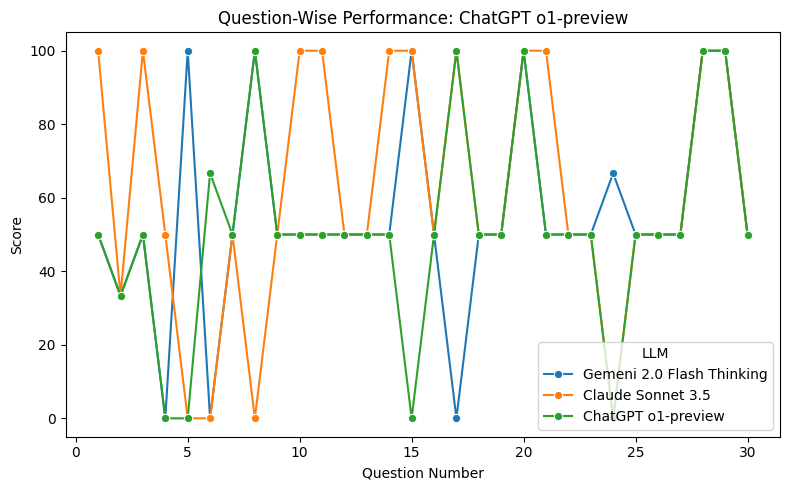

In [21]:
#visualize how each llm did on each exam question by question.  One plot per exam
exams = df_questions["Exam"].unique()

for exam_name in exams:
    df_exam = df_questions[df_questions["Exam"] == exam_name]

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df_exam, x="Question", y="Percent", hue="LLM", marker="o")
    plt.title(f"Question-Wise Performance: {exam_name}")
    plt.xlabel("Question Number")
    plt.ylabel("Score")
    plt.legend(title="LLM")
    plt.tight_layout()
    plt.show()

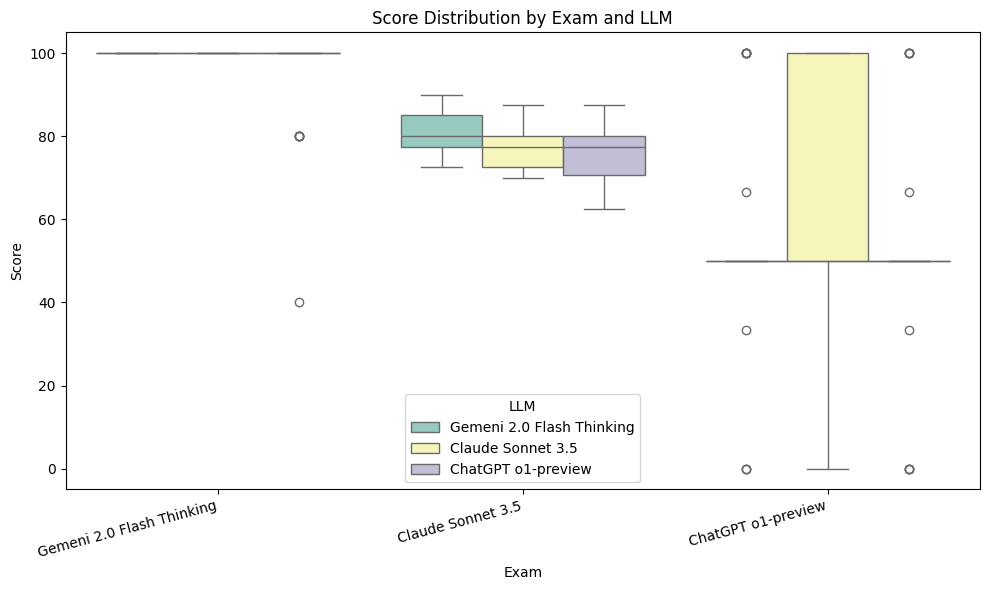

In [22]:
#view a boxplot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_questions, x="Exam", y="Percent", hue="LLM", palette="Set3")
plt.title("Score Distribution by Exam and LLM")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.xticks(rotation=15, ha='right')
plt.legend(title="LLM")
plt.tight_layout()
plt.show()

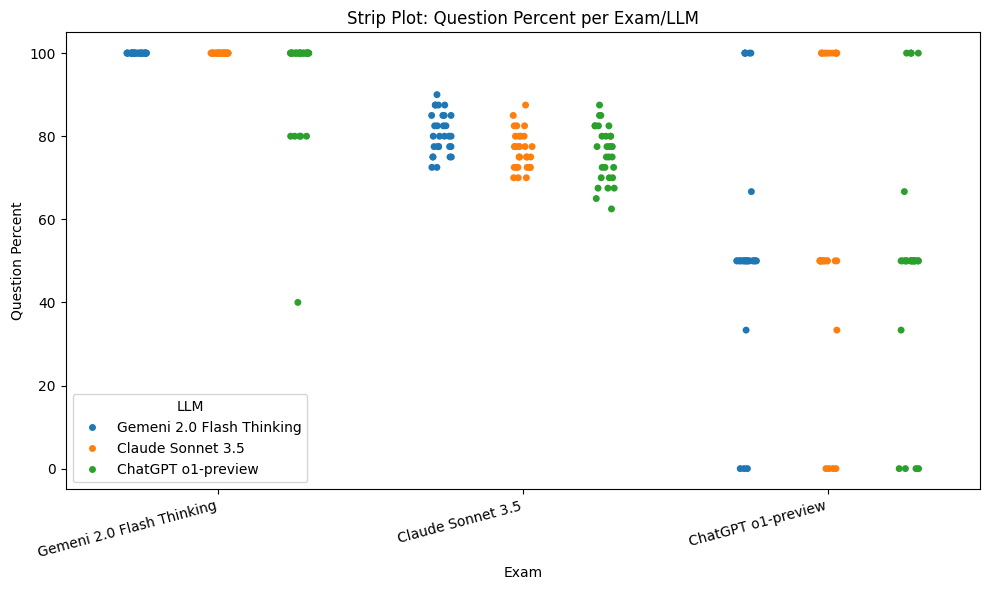

In [23]:
#view a strip plot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_questions, x="Exam", y="Percent", hue="LLM", dodge=True)
plt.title("Strip Plot: Question Percent per Exam/LLM")
plt.xlabel("Exam")
plt.ylabel("Question Percent")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

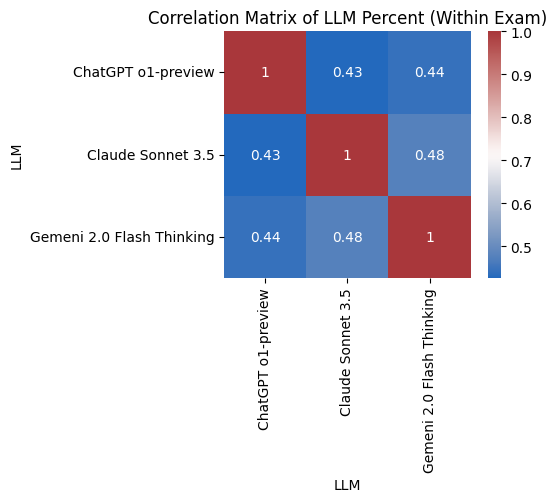

In [ ]:
#Heatmap showing the correlation between the performance of the LLMs
df_pivot = df_questions.pivot_table(index="Question", columns="LLM", values="Percent")
corr_matrix = df_pivot.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="vlag", square=True)
plt.title("Correlation Matrix of LLM Percent (Within Exam)")
plt.tight_layout()
plt.show()

<h2>Run #2</h2>

In [25]:
#Path to use to store each LLM's results, rubric, test, response to tests, etc for later examination
path = "data/run2"

In [26]:
#Go through the LLM list and have each build a test and rubric using GraderLLM functions
for llm in llms:
  llm.buildTestAndRubric()
  #Write the test and rubric to a test file to examine later (take a look at this, 
  # there are some really interesting questions they come up with)
  with open(f"{path}/{llm.name}/test.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.test)
  with open(f"{path}/{llm.name}/rubric.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.rubric)

Creating test for Gemeni 2.0 Flash Thinking:
Finished making test for Gemeni 2.0 Flash Thinking
Logical Deduction and Inference:
If all squares are rectangles, and shape A is a square, is shape A a rectangle?
Premise 1: Birds can fly. Premise 2: Penguins are birds. Conclusion: Can penguins fly?
Only authorized personnel are allowed beyond this point. John is not authorized personnel. Is John allowed beyond this point?
If it is raining, the streets are wet. The streets are not wet. Is it raining?
All cats are mammals. Some mammals are pets. Are all cats pets?

Common Sense Reasoning:
Why is it generally colder in winter than in summer?
If you drop a glass on a hard floor, what is likely to happen?
What is the purpose of a refrigerator?
Where would you typically go to see a doctor when you are sick?
What would you use to cut a piece of paper if you don't have scissors?

Counterfactual Reasoning:
If humans had wings, how would society be different?
What if the internet had never been inve

In [ ]:
#nested for loop.  Each LLM will use its test and rubric to grade each other LLM and itself.
for grader in llms:
    for gradee in llms:
        grader.applyTest(gradee)
        #Save the response and score to text files for later examination
        with open(f"{path}/{gradee.name}/responses/{grader.name}/response.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['response'])
        with open(f"{path}/{gradee.name}/responses/{grader.name}/score.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['score'])


Gemeni 2.0 Flash Thinking is testing Gemeni 2.0 Flash Thinking
Gemeni 2.0 Flash Thinking is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing Claude Sonnet 3.5
Gemeni 2.0 Flash Thinking is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing ChatGPT o1-preview
Gemeni 2.0 Flash Thinking is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Gemeni 2.0 Flash Thinking
Claude Sonnet 3.5 is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Claude Sonnet 3.5
Claude Sonnet 3.5 is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing ChatGPT o1-preview
Claude Sonnet 3.5 is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
ChatGPT o1-preview is testing Gemeni 2.0 Flash Thinking
ChatGPT o1-preview is done testing Gemeni 2.0 Flas

In [28]:
#build a dictionary where the llm namaes are keys and the scores are values
all_llm_dict = {llm.name: llm.scores for llm in llms}

In [29]:
#We'll be building 2 pandas dfs
rows = []
rows_total = []

#One for totals (exam level)
for llm_name, exams_dict in all_llm_dict.items():
    for exam_name, exam_data in exams_dict.items():
        # TOTALS
        rows_total.append({
            "LLM": llm_name,
            "Exam": exam_name,
            "TotalScore": exam_data["score_total"],
            "OverallPercent": exam_data["score_percentage"]
        })
        
        #one for questions
        # QUESTION-LEVEL
        score_array = exam_data["score_array"]
        percent_by_q = exam_data["percent_by_q"]
        for i, (sc, pct) in enumerate(zip(score_array, percent_by_q), start=1):
            rows.append({
                "LLM": llm_name,
                "Exam": exam_name,
                "Question": i,
                "Score": sc,
                "Percent": pct
            })

#Create the dfs
df_questions_2 = pd.DataFrame(rows)
df_totals_2 = pd.DataFrame(rows_total)

In [30]:
#leave the orginal dfs and make copies to use for visualizations
df_questions = copy.copy(df_questions_2)
df_totals = copy.copy(df_totals_2)

In [31]:
#examine the questions dataframe
df_questions.head()

,LLM,Exam,Question,Score,Percent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,1,3.0,100.0
1,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,2,3.0,100.0
2,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,3,3.0,100.0
3,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,4,3.0,100.0
4,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,5,3.0,100.0


In [32]:
#dxamine the totals dataframe
df_totals.head()

,LLM,Exam,TotalScore,OverallPercent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,148.0,82.222222
1,Gemeni 2.0 Flash Thinking,Claude Sonnet 3.5,1332.0,74.000000
2,Gemeni 2.0 Flash Thinking,ChatGPT o1-preview,89.0,49.444444
3,Claude Sonnet 3.5,Gemeni 2.0 Flash Thinking,150.0,83.333333
4,Claude Sonnet 3.5,Claude Sonnet 3.5,1391.0,77.277778


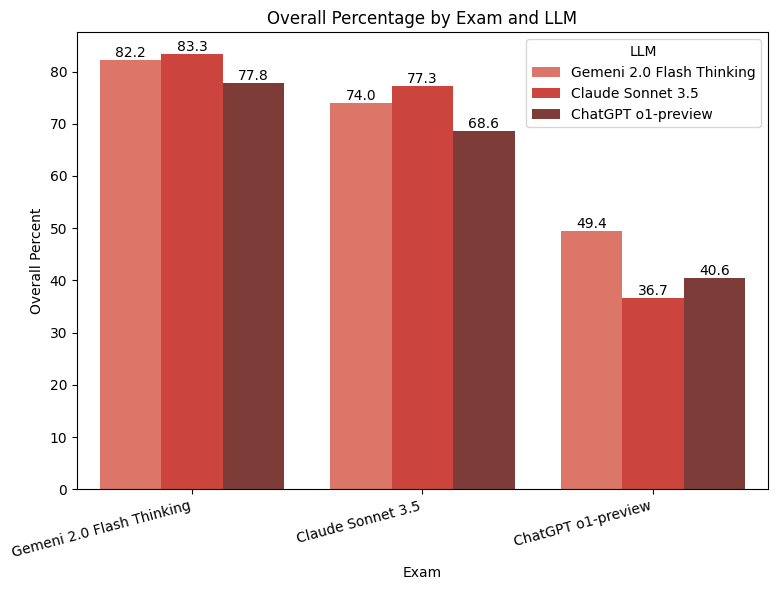

In [33]:
#Visualize how each LLM performed on each exam
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_totals, x="Exam", y="OverallPercent", hue="LLM", palette="Reds_d")
plt.title("Overall Percentage by Exam and LLM")
plt.ylabel("Overall Percent")
plt.xlabel("Exam")
plt.xticks(rotation=15, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")
plt.tight_layout()
plt.show()

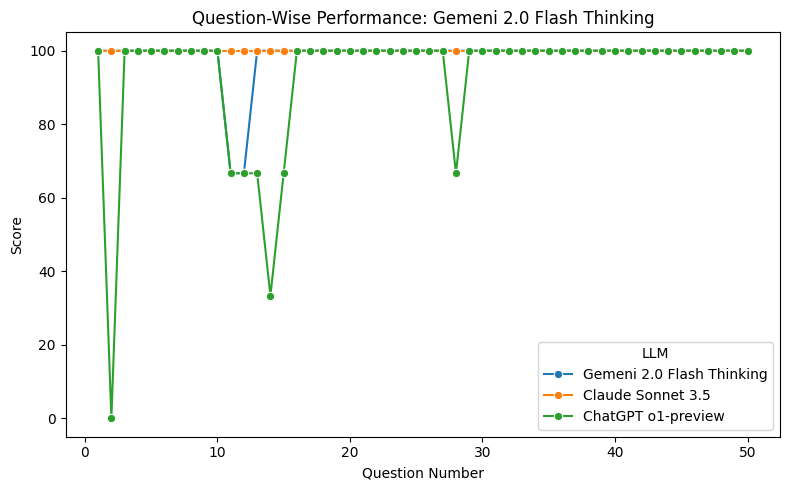

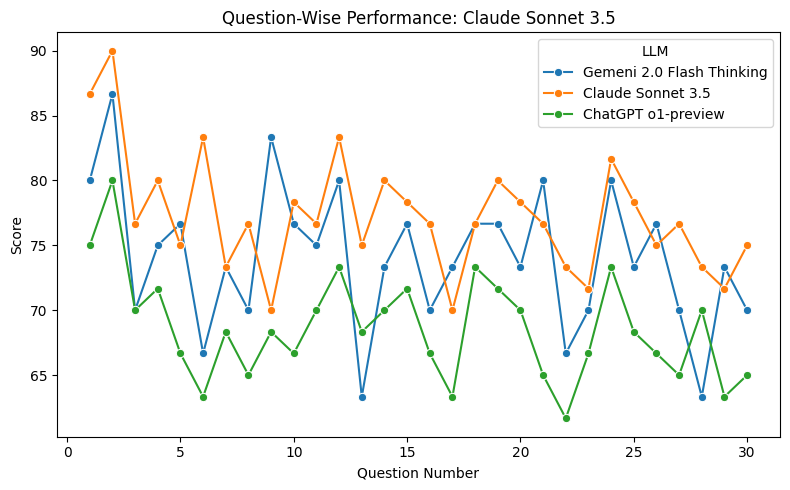

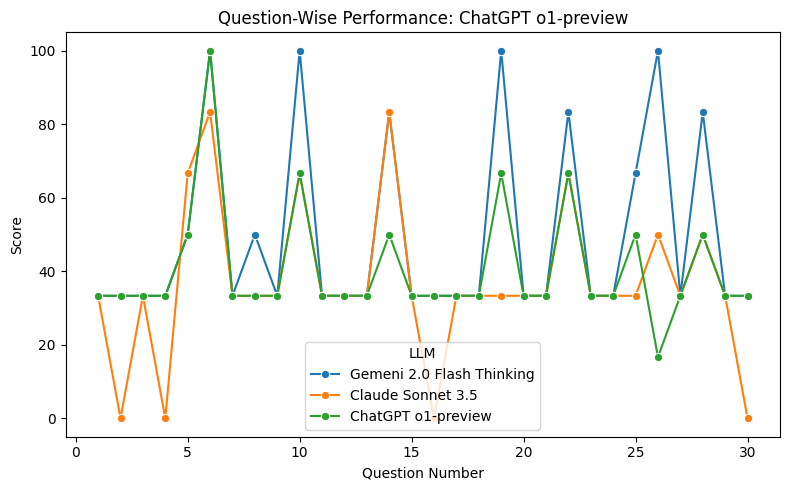

In [34]:
#visualize how each llm did on each exam question by question.  One plot per exam
exams = df_questions["Exam"].unique()

for exam_name in exams:
    df_exam = df_questions[df_questions["Exam"] == exam_name]

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df_exam, x="Question", y="Percent", hue="LLM", marker="o")
    plt.title(f"Question-Wise Performance: {exam_name}")
    plt.xlabel("Question Number")
    plt.ylabel("Score")
    plt.legend(title="LLM")
    plt.tight_layout()
    plt.show()

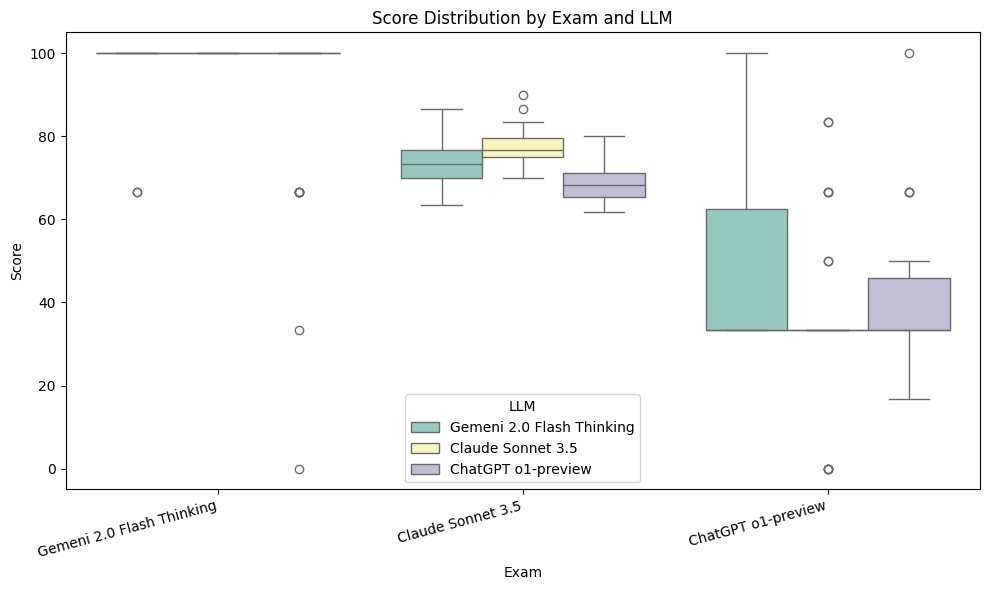

In [35]:
#view a boxplot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_questions, x="Exam", y="Percent", hue="LLM", palette="Set3")
plt.title("Score Distribution by Exam and LLM")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.xticks(rotation=15, ha='right')
plt.legend(title="LLM")
plt.tight_layout()
plt.show()

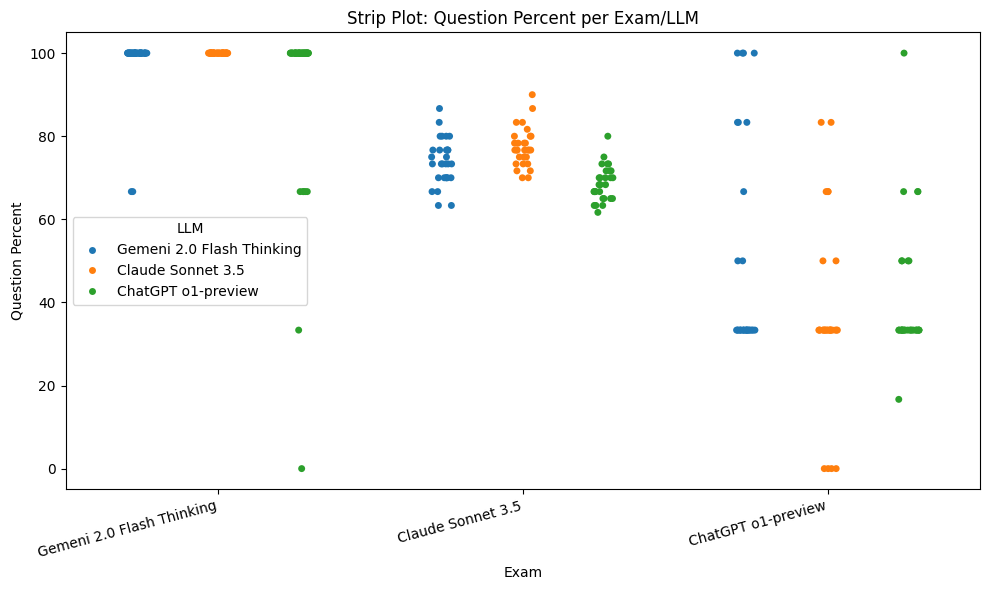

In [36]:
#view a strip plot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_questions, x="Exam", y="Percent", hue="LLM", dodge=True)
plt.title("Strip Plot: Question Percent per Exam/LLM")
plt.xlabel("Exam")
plt.ylabel("Question Percent")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

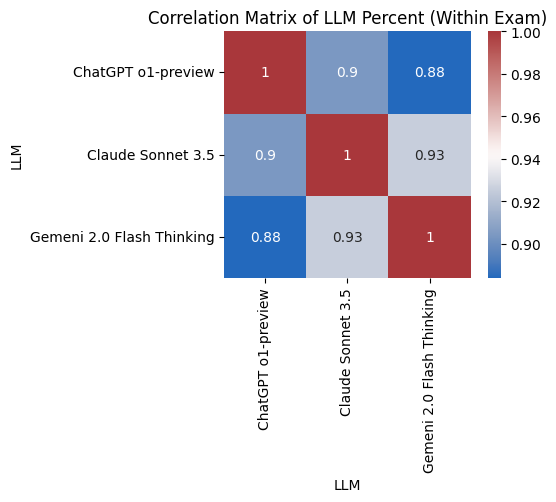

In [37]:
#Heatmap showing the correlation between the performance of the LLMs
df_pivot = df_questions.pivot_table(index="Question", columns="LLM", values="Percent")
corr_matrix = df_pivot.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="vlag", square=True)
plt.title("Correlation Matrix of LLM Percent (Within Exam)")
plt.tight_layout()
plt.show()

<h2>Run #3</h2>

In [38]:
#Path to use to store each LLM's results, rubric, test, response to tests, etc for later examination
path = "data/run3"

In [39]:
#Go through the LLM list and have each build a test and rubric using GraderLLM functions
for llm in llms:
  llm.buildTestAndRubric()
  #Write the test and rubric to a test file to examine later (take a look at this, 
  # there are some really interesting questions they come up with)
  with open(f"{path}/{llm.name}/test.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.test)
  with open(f"{path}/{llm.name}/rubric.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.rubric)

Creating test for Gemeni 2.0 Flash Thinking:
Finished making test for Gemeni 2.0 Flash Thinking
If all squares are rectangles and some rectangles are rhombuses, are all squares rhombuses? Explain your reasoning.
Premise 1: All dogs bark. Premise 2: Fido does not bark. Conclusion: Fido is not a dog. Is this conclusion valid? Why or why not?
If A implies B, and B implies C, does A necessarily imply C? Explain your answer.
You enter your house and find the door open, your dog barking excitedly, and a vase broken on the floor. What is the most likely explanation for these observations?
A patient presents with a fever, cough, and fatigue.  List three possible diagnoses, ordered from most to least likely, and explain your reasoning for each.
You see a footprint in the mud that is very large and has three toes.  What kind of creature might have made this footprint?
Complete the analogy:  Doctor is to patient as teacher is to _____. Explain your choice.
If "hot" is the opposite of "cold," what

In [ ]:
#nested for loop.  Each LLM will use its test and rubric to grade each other LLM and itself.
for grader in llms:
    for gradee in llms:
        grader.applyTest(gradee)
        #Save the response and score to text files for later examination
        with open(f"{path}/{gradee.name}/responses/{grader.name}/response.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['response'])
        with open(f"{path}/{gradee.name}/responses/{grader.name}/score.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['score'])


Gemeni 2.0 Flash Thinking is testing Gemeni 2.0 Flash Thinking
Gemeni 2.0 Flash Thinking is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing Claude Sonnet 3.5
Gemeni 2.0 Flash Thinking is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing ChatGPT o1-preview
Gemeni 2.0 Flash Thinking is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Gemeni 2.0 Flash Thinking
Claude Sonnet 3.5 is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Claude Sonnet 3.5
Claude Sonnet 3.5 is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing ChatGPT o1-preview
Claude Sonnet 3.5 is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
ChatGPT o1-preview is testing Gemeni 2.0 Flash Thinking
ChatGPT o1-preview is done testing Gemeni 2.0 Flas

In [42]:
#build a dictionary where the llm namaes are keys and the scores are values
all_llm_dict = {llm.name: llm.scores for llm in llms}

In [43]:
#We'll be building 2 pandas dfs
rows = []
rows_total = []

#One for totals (exam level)
for llm_name, exams_dict in all_llm_dict.items():
    for exam_name, exam_data in exams_dict.items():
        # TOTALS
        rows_total.append({
            "LLM": llm_name,
            "Exam": exam_name,
            "TotalScore": exam_data["score_total"],
            "OverallPercent": exam_data["score_percentage"]
        })
        
        #one for questions
        # QUESTION-LEVEL
        score_array = exam_data["score_array"]
        percent_by_q = exam_data["percent_by_q"]
        for i, (sc, pct) in enumerate(zip(score_array, percent_by_q), start=1):
            rows.append({
                "LLM": llm_name,
                "Exam": exam_name,
                "Question": i,
                "Score": sc,
                "Percent": pct
            })

#Create the dfs
df_questions_3 = pd.DataFrame(rows)
df_totals_3 = pd.DataFrame(rows_total)

In [44]:
#leave the orginal dfs and make copies to use for visualizations
df_questions = copy.copy(df_questions_3)
df_totals = copy.copy(df_totals_3)

In [45]:
#examine the questions dataframe
df_questions.head()

,LLM,Exam,Question,Score,Percent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,1,3.0,100.000000
1,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,2,2.0,66.666667
2,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,3,3.0,100.000000
3,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,4,2.0,66.666667
4,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,5,3.0,100.000000


In [46]:
#dxamine the totals dataframe
df_totals.head()

,LLM,Exam,TotalScore,OverallPercent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,103.0,95.370370
1,Gemeni 2.0 Flash Thinking,Claude Sonnet 3.5,876.0,87.600000
2,Gemeni 2.0 Flash Thinking,ChatGPT o1-preview,27.0,64.285714
3,Claude Sonnet 3.5,Gemeni 2.0 Flash Thinking,94.0,87.037037
4,Claude Sonnet 3.5,Claude Sonnet 3.5,666.0,66.600000


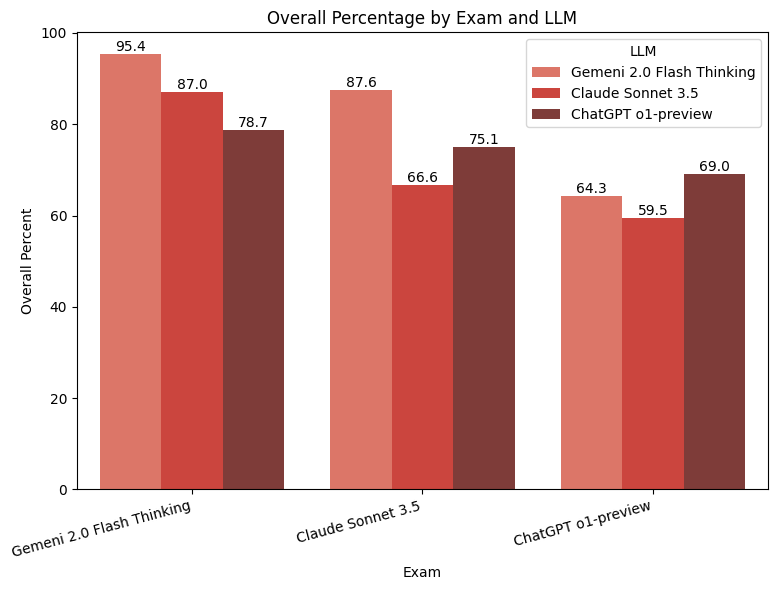

In [47]:
#Visualize how each LLM performed on each exam
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_totals, x="Exam", y="OverallPercent", hue="LLM", palette="Reds_d")
plt.title("Overall Percentage by Exam and LLM")
plt.ylabel("Overall Percent")
plt.xlabel("Exam")
plt.xticks(rotation=15, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")
plt.tight_layout()
plt.show()

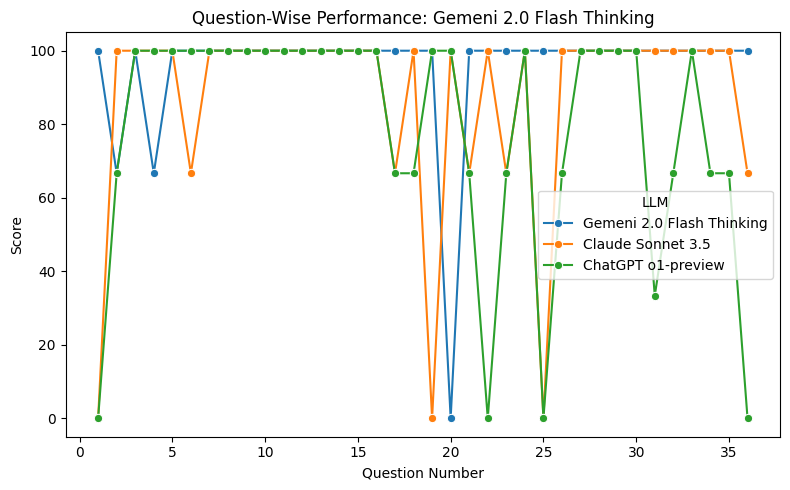

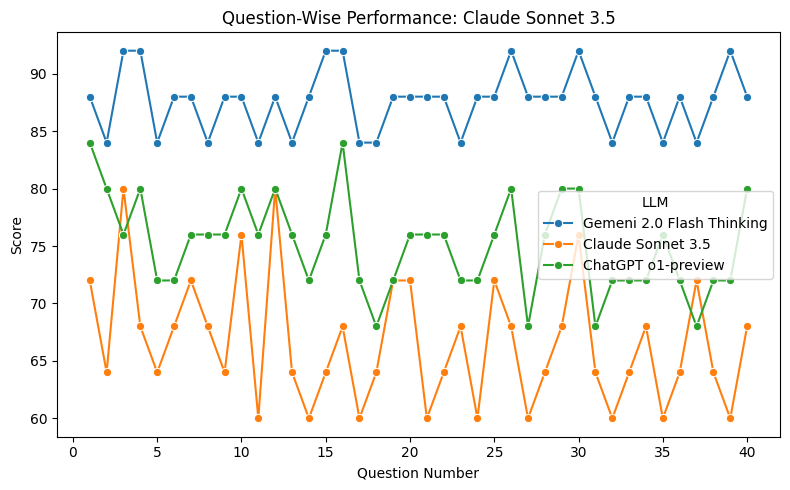

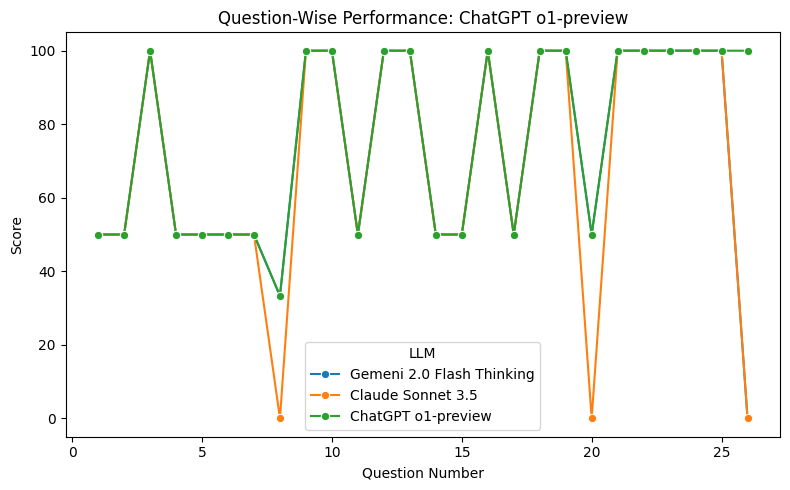

In [48]:
#visualize how each llm did on each exam question by question.  One plot per exam
exams = df_questions["Exam"].unique()

for exam_name in exams:
    df_exam = df_questions[df_questions["Exam"] == exam_name]

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df_exam, x="Question", y="Percent", hue="LLM", marker="o")
    plt.title(f"Question-Wise Performance: {exam_name}")
    plt.xlabel("Question Number")
    plt.ylabel("Score")
    plt.legend(title="LLM")
    plt.tight_layout()
    plt.show()

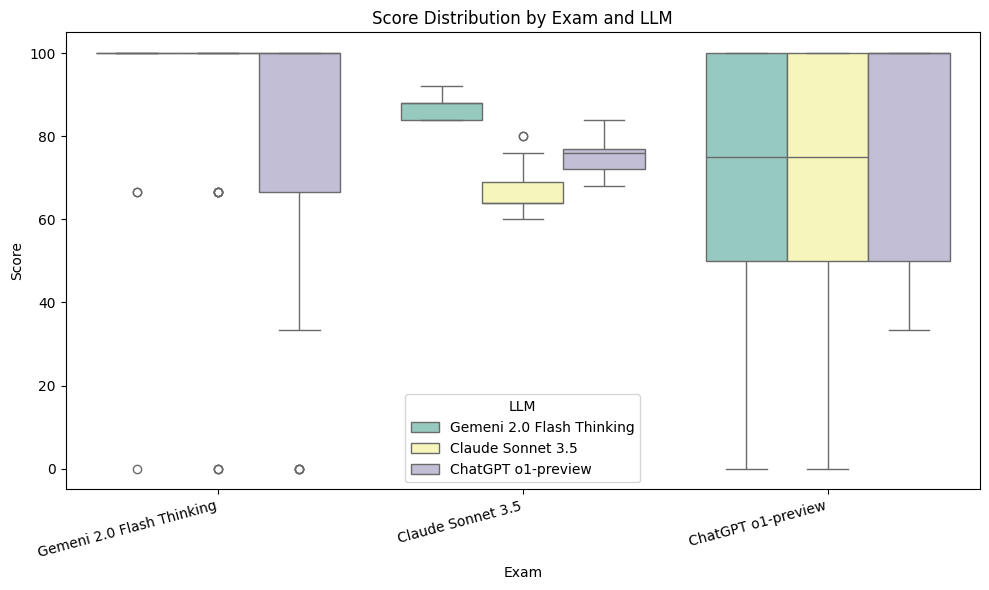

In [49]:
#view a boxplot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_questions, x="Exam", y="Percent", hue="LLM", palette="Set3")
plt.title("Score Distribution by Exam and LLM")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.xticks(rotation=15, ha='right')
plt.legend(title="LLM")
plt.tight_layout()
plt.show()

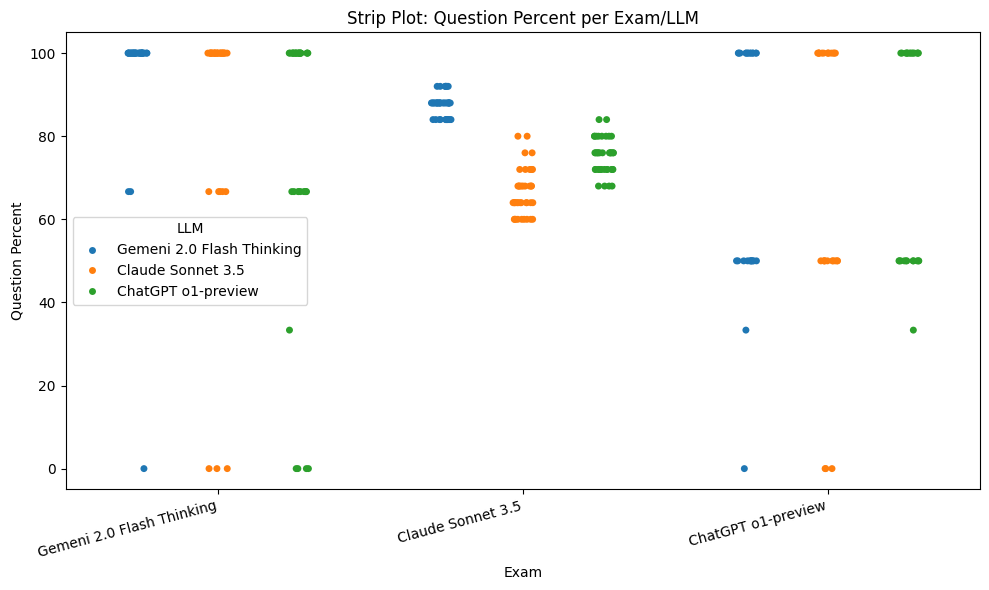

In [50]:
#view a strip plot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_questions, x="Exam", y="Percent", hue="LLM", dodge=True)
plt.title("Strip Plot: Question Percent per Exam/LLM")
plt.xlabel("Exam")
plt.ylabel("Question Percent")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

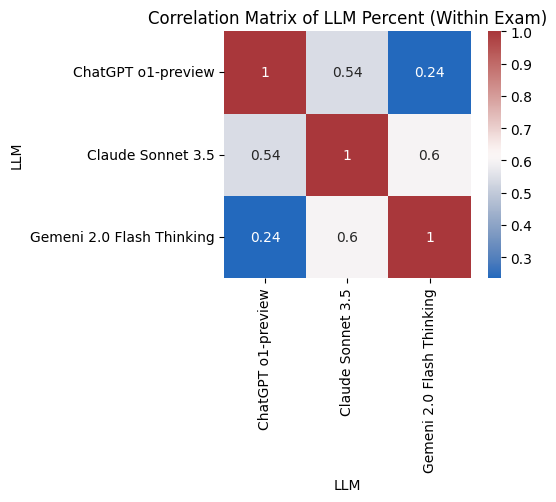

In [51]:
#Heatmap showing the correlation between the performance of the LLMs
df_pivot = df_questions.pivot_table(index="Question", columns="LLM", values="Percent")
corr_matrix = df_pivot.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="vlag", square=True)
plt.title("Correlation Matrix of LLM Percent (Within Exam)")
plt.tight_layout()
plt.show()

<h2>Run #4</h2>

In [52]:
#Path to use to store each LLM's results, rubric, test, response to tests, etc for later examination
path = "data/run4"

In [53]:
#Go through the LLM list and have each build a test and rubric using GraderLLM functions
for llm in llms:
  llm.buildTestAndRubric()
  #Write the test and rubric to a test file to examine later (take a look at this, 
  # there are some really interesting questions they come up with)
  with open(f"{path}/{llm.name}/test.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.test)
  with open(f"{path}/{llm.name}/rubric.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.rubric)

Creating test for Gemeni 2.0 Flash Thinking:
Finished making test for Gemeni 2.0 Flash Thinking
All squares are rectangles. Some rectangles are rhombuses. Are all squares rhombuses? Explain your reasoning.
If A implies B, and B implies C, does A imply C? Explain why or why not and give an example.
Premise 1: If it rains, the ground is wet. Premise 2: The ground is wet. Conclusion: It rained. Is this conclusion valid? Why or why not?
A city implemented a new traffic light system and noticed a decrease in traffic accidents. Is it safe to conclude that the new traffic light system caused the decrease in accidents? Explain your reasoning and consider other possible factors.
Eating a certain type of berry has been correlated with increased longevity in a study. Does this mean eating these berries will definitely make you live longer? Explain your answer.
If a plant is given fertilizer, it grows taller. What other factors could influence the plant's growth besides fertilizer?
If World War II

In [ ]:
#nested for loop.  Each LLM will use its test and rubric to grade each other LLM and itself.
for grader in llms:
    for gradee in llms:
        grader.applyTest(gradee)
        #Save the response and score to text files for later examination
        with open(f"{path}/{gradee.name}/responses/{grader.name}/response.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['response'])
        with open(f"{path}/{gradee.name}/responses/{grader.name}/score.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['score'])


Gemeni 2.0 Flash Thinking is testing Gemeni 2.0 Flash Thinking
Gemeni 2.0 Flash Thinking is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing Claude Sonnet 3.5
Gemeni 2.0 Flash Thinking is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing ChatGPT o1-preview
Gemeni 2.0 Flash Thinking is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Gemeni 2.0 Flash Thinking
Claude Sonnet 3.5 is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Claude Sonnet 3.5
Claude Sonnet 3.5 is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing ChatGPT o1-preview
Claude Sonnet 3.5 is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
ChatGPT o1-preview is testing Gemeni 2.0 Flash Thinking
ChatGPT o1-preview is done testing Gemeni 2.0 Flas

In [56]:
#build a dictionary where the llm namaes are keys and the scores are values
all_llm_dict = {llm.name: llm.scores for llm in llms}

In [57]:
#We'll be building 2 pandas dfs
rows = []
rows_total = []

#One for totals (exam level)
for llm_name, exams_dict in all_llm_dict.items():
    for exam_name, exam_data in exams_dict.items():
        # TOTALS
        rows_total.append({
            "LLM": llm_name,
            "Exam": exam_name,
            "TotalScore": exam_data["score_total"],
            "OverallPercent": exam_data["score_percentage"]
        })
        
        #one for questions
        # QUESTION-LEVEL
        score_array = exam_data["score_array"]
        percent_by_q = exam_data["percent_by_q"]
        for i, (sc, pct) in enumerate(zip(score_array, percent_by_q), start=1):
            rows.append({
                "LLM": llm_name,
                "Exam": exam_name,
                "Question": i,
                "Score": sc,
                "Percent": pct
            })

#Create the dfs
df_questions_4 = pd.DataFrame(rows)
df_totals_4 = pd.DataFrame(rows_total)

In [58]:
#leave the orginal dfs and make copies to use for visualizations
df_questions = copy.copy(df_questions_4)
df_totals = copy.copy(df_totals_4)

In [59]:
#examine the questions dataframe
df_questions.head()

,LLM,Exam,Question,Score,Percent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,1,10.0,100.0
1,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,2,10.0,100.0
2,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,3,10.0,100.0
3,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,4,10.0,100.0
4,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,5,10.0,100.0


In [60]:
#dxamine the totals dataframe
df_totals.head()

,LLM,Exam,TotalScore,OverallPercent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,390.0,100.000000
1,Gemeni 2.0 Flash Thinking,Claude Sonnet 3.5,435.0,72.500000
2,Gemeni 2.0 Flash Thinking,ChatGPT o1-preview,138.0,65.714286
3,Claude Sonnet 3.5,Gemeni 2.0 Flash Thinking,371.0,95.128205
4,Claude Sonnet 3.5,Claude Sonnet 3.5,400.0,66.666667


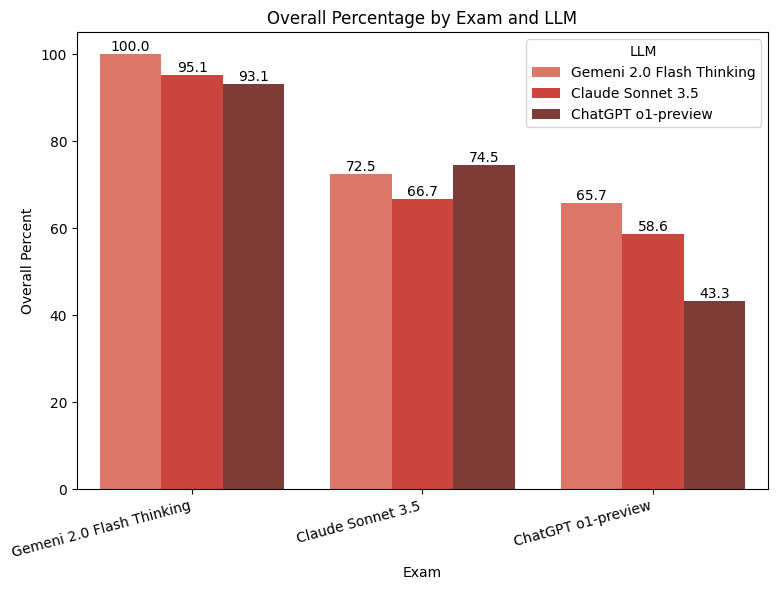

In [61]:
#Visualize how each LLM performed on each exam
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_totals, x="Exam", y="OverallPercent", hue="LLM", palette="Reds_d")
plt.title("Overall Percentage by Exam and LLM")
plt.ylabel("Overall Percent")
plt.xlabel("Exam")
plt.xticks(rotation=15, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")
plt.tight_layout()
plt.show()

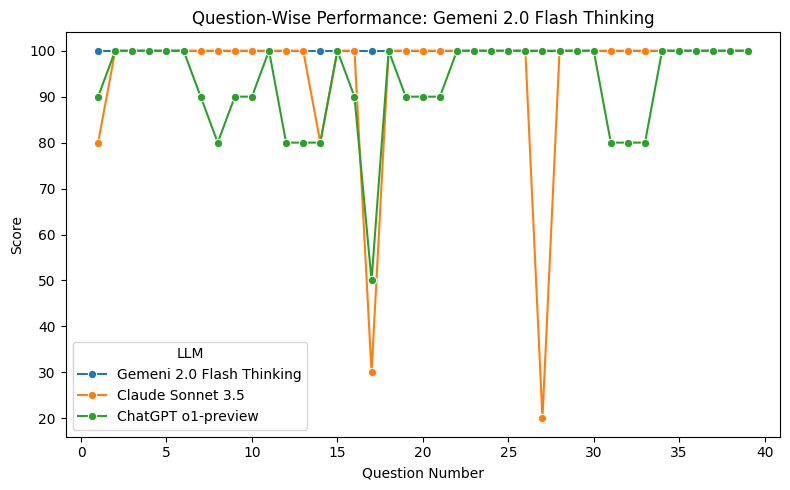

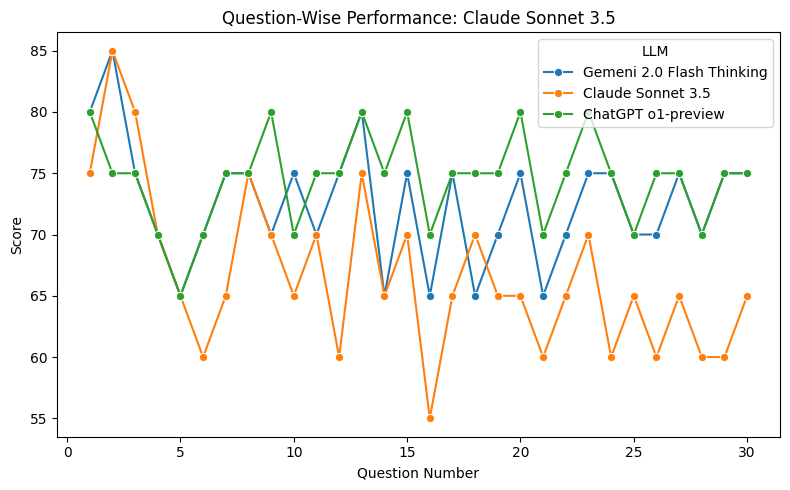

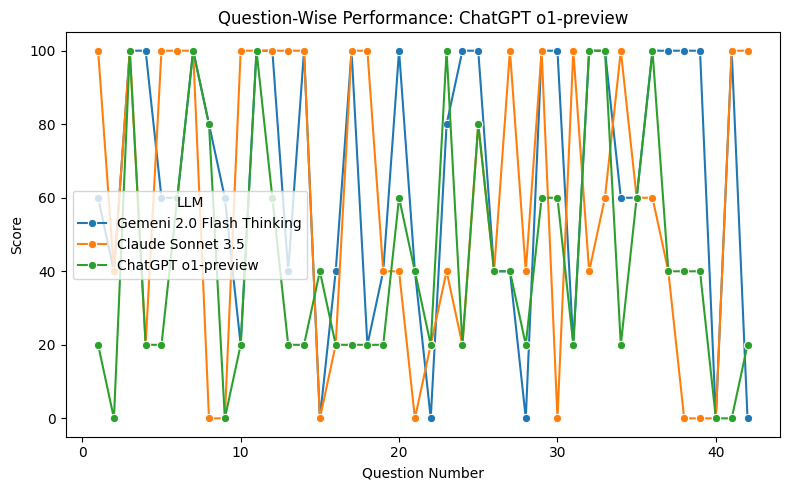

In [62]:
#visualize how each llm did on each exam question by question.  One plot per exam
exams = df_questions["Exam"].unique()

for exam_name in exams:
    df_exam = df_questions[df_questions["Exam"] == exam_name]

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df_exam, x="Question", y="Percent", hue="LLM", marker="o")
    plt.title(f"Question-Wise Performance: {exam_name}")
    plt.xlabel("Question Number")
    plt.ylabel("Score")
    plt.legend(title="LLM")
    plt.tight_layout()
    plt.show()

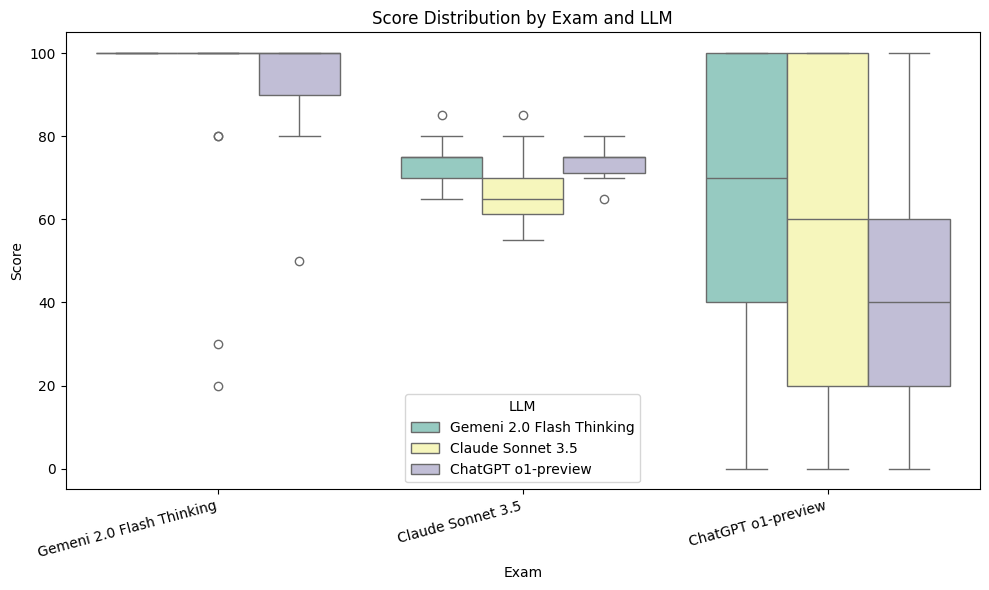

In [63]:
#view a boxplot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_questions, x="Exam", y="Percent", hue="LLM", palette="Set3")
plt.title("Score Distribution by Exam and LLM")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.xticks(rotation=15, ha='right')
plt.legend(title="LLM")
plt.tight_layout()
plt.show()

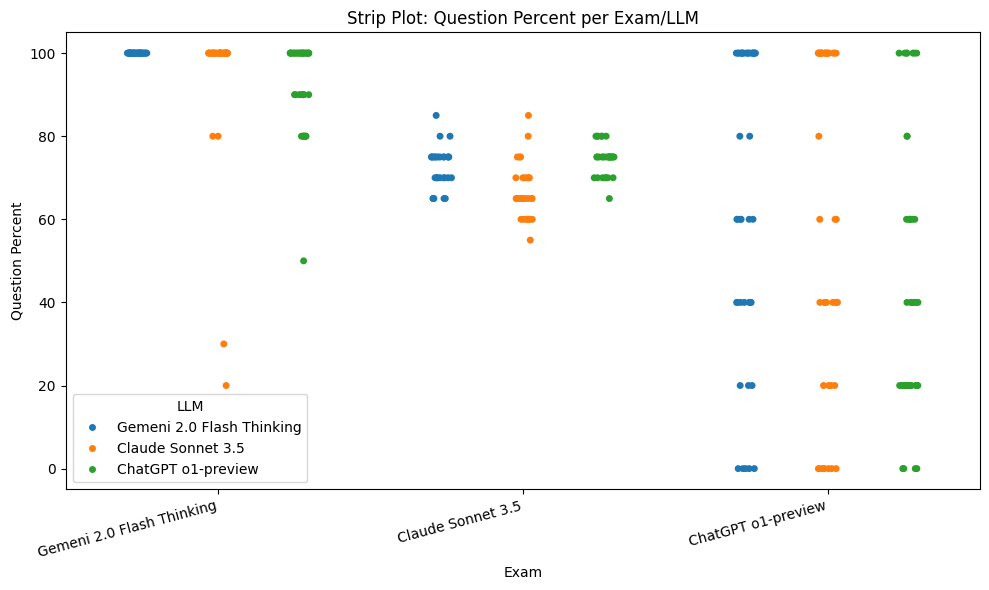

In [64]:
#view a strip plot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_questions, x="Exam", y="Percent", hue="LLM", dodge=True)
plt.title("Strip Plot: Question Percent per Exam/LLM")
plt.xlabel("Exam")
plt.ylabel("Question Percent")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

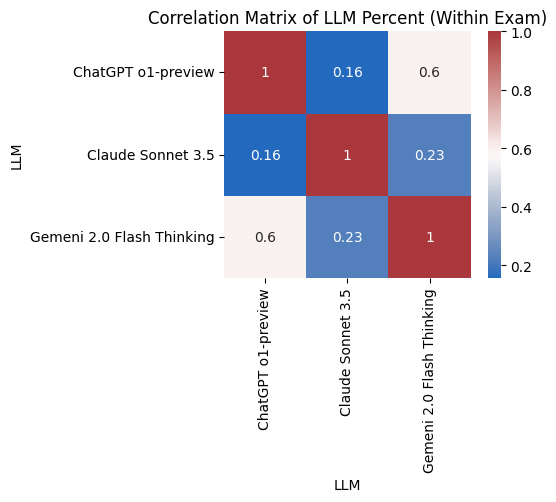

In [65]:
#Heatmap showing the correlation between the performance of the LLMs
df_pivot = df_questions.pivot_table(index="Question", columns="LLM", values="Percent")
corr_matrix = df_pivot.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="vlag", square=True)
plt.title("Correlation Matrix of LLM Percent (Within Exam)")
plt.tight_layout()
plt.show()

<h2>Run #5</h2>

In [66]:
#Path to use to store each LLM's results, rubric, test, response to tests, etc for later examination
path = "data/run5"

In [67]:
#Go through the LLM list and have each build a test and rubric using GraderLLM functions
for llm in llms:
  llm.buildTestAndRubric()
  #Write the test and rubric to a test file to examine later (take a look at this, 
  # there are some really interesting questions they come up with)
  with open(f"{path}/{llm.name}/test.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.test)
  with open(f"{path}/{llm.name}/rubric.txt", "w", encoding="utf-8", errors="ignore") as file:
    file.write(llm.rubric)

Creating test for Gemeni 2.0 Flash Thinking:
Finished making test for Gemeni 2.0 Flash Thinking
Logical Deduction/Inference:
All squares are rectangles. All rectangles are quadrilaterals. Shape A is a square. What can you definitively conclude about Shape A?
If it rains, the ground gets wet. The ground is not wet. Therefore, what can you conclude?
Only employees with security clearance can access the vault. John accessed the vault. Does John have security clearance? Explain your reasoning.
Premise 1: Birds can fly. Premise 2: Penguins are birds. Premise 3: Penguins cannot fly. Identify the contradiction and explain why it is not a logical fallacy in the real world.

Causal Reasoning:
A plant is wilting. What are three possible causes for this?
A city experiences a sudden increase in traffic congestion after a new bridge is built. Explain a possible causal link, and also mention a potential confounding factor.
Eating too much sugar can lead to weight gain. Design an experiment to test t

In [68]:
#nested for loop.  Each LLM will use its test and rubric to grade each other LLM and itself.
for grader in llms:
    for gradee in llms:
        grader.applyTest(gradee)
        #Save the response and score to text files for later examination
        with open(f"{path}/{gradee.name}/responses/{grader.name}/response.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['response'])
        with open(f"{path}/{gradee.name}/responses/{grader.name}/score.txt", "w", encoding="utf-8", errors="ignore") as file:
            file.write(gradee.scores[grader.name]['score'])


Gemeni 2.0 Flash Thinking is testing Gemeni 2.0 Flash Thinking
Gemeni 2.0 Flash Thinking is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing Claude Sonnet 3.5
Gemeni 2.0 Flash Thinking is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Gemeni 2.0 Flash Thinking is testing ChatGPT o1-preview
Gemeni 2.0 Flash Thinking is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Gemeni 2.0 Flash Thinking
Claude Sonnet 3.5 is done testing Gemeni 2.0 Flash Thinking
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing Claude Sonnet 3.5
Claude Sonnet 3.5 is done testing Claude Sonnet 3.5
Calculating grade
Grade calculated!
Claude Sonnet 3.5 is testing ChatGPT o1-preview
Claude Sonnet 3.5 is done testing ChatGPT o1-preview
Calculating grade
Grade calculated!
ChatGPT o1-preview is testing Gemeni 2.0 Flash Thinking
ChatGPT o1-preview is done testing Gemeni 2.0 Flas

In [69]:
#build a dictionary where the llm namaes are keys and the scores are values
all_llm_dict = {llm.name: llm.scores for llm in llms}

In [70]:
#We'll be building 2 pandas dfs
rows = []
rows_total = []

#One for totals (exam level)
for llm_name, exams_dict in all_llm_dict.items():
    for exam_name, exam_data in exams_dict.items():
        # TOTALS
        rows_total.append({
            "LLM": llm_name,
            "Exam": exam_name,
            "TotalScore": exam_data["score_total"],
            "OverallPercent": exam_data["score_percentage"]
        })
        
        #one for questions
        # QUESTION-LEVEL
        score_array = exam_data["score_array"]
        percent_by_q = exam_data["percent_by_q"]
        for i, (sc, pct) in enumerate(zip(score_array, percent_by_q), start=1):
            rows.append({
                "LLM": llm_name,
                "Exam": exam_name,
                "Question": i,
                "Score": sc,
                "Percent": pct
            })

#Create the dfs
df_questions_5 = pd.DataFrame(rows)
df_totals_5 = pd.DataFrame(rows_total)

In [71]:
#leave the orginal dfs and make copies to use for visualizations
df_questions = copy.copy(df_questions_5)
df_totals = copy.copy(df_totals_5)

In [72]:
#examine the questions dataframe
df_questions.head()

,LLM,Exam,Question,Score,Percent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,1,16.0,80.0
1,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,2,16.0,80.0
2,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,3,16.0,80.0
3,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,4,16.0,80.0
4,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,5,16.0,80.0


In [73]:
#dxamine the totals dataframe
df_totals.head()

,LLM,Exam,TotalScore,OverallPercent
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,783.0,81.562500
1,Gemeni 2.0 Flash Thinking,Claude Sonnet 3.5,527.0,87.833333
2,Gemeni 2.0 Flash Thinking,ChatGPT o1-preview,162.0,90.000000
3,Claude Sonnet 3.5,Gemeni 2.0 Flash Thinking,958.0,99.791667
4,Claude Sonnet 3.5,Claude Sonnet 3.5,425.0,70.833333


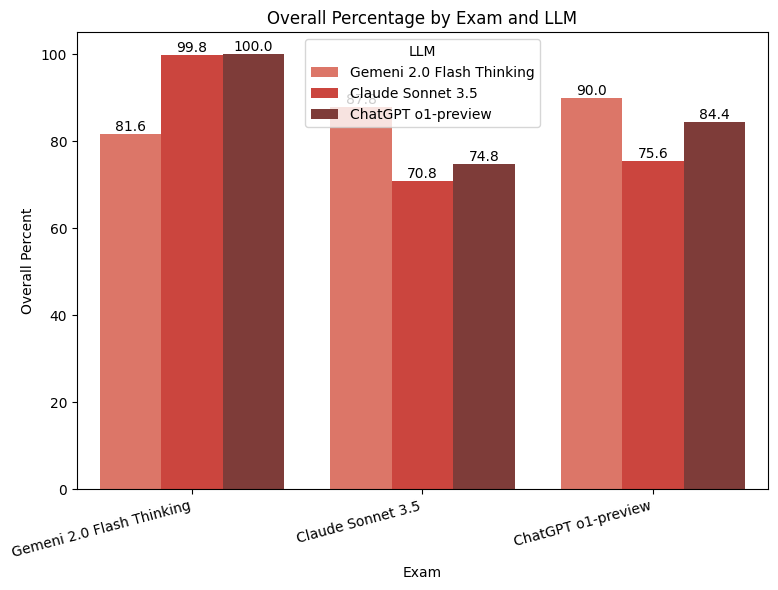

In [74]:
#Visualize how each LLM performed on each exam
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_totals, x="Exam", y="OverallPercent", hue="LLM", palette="Reds_d")
plt.title("Overall Percentage by Exam and LLM")
plt.ylabel("Overall Percent")
plt.xlabel("Exam")
plt.xticks(rotation=15, ha="right")
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")
plt.tight_layout()
plt.show()

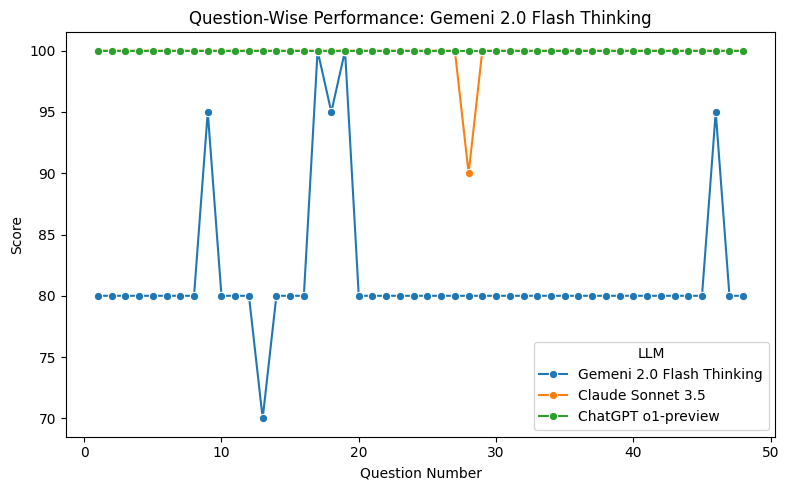

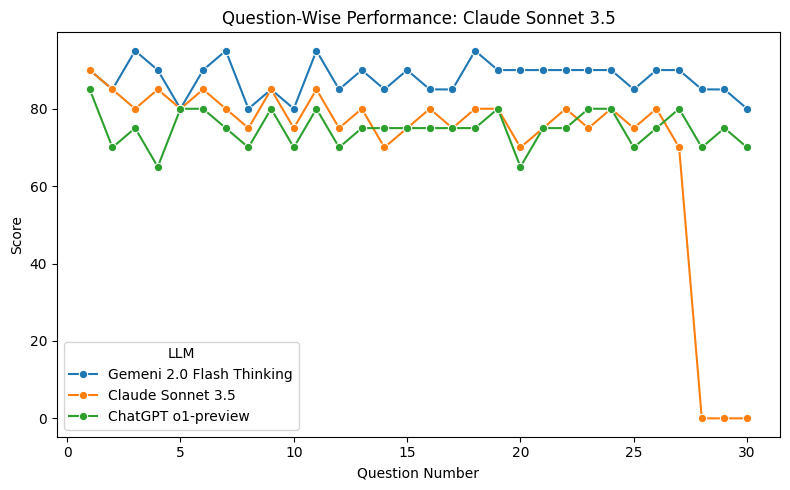

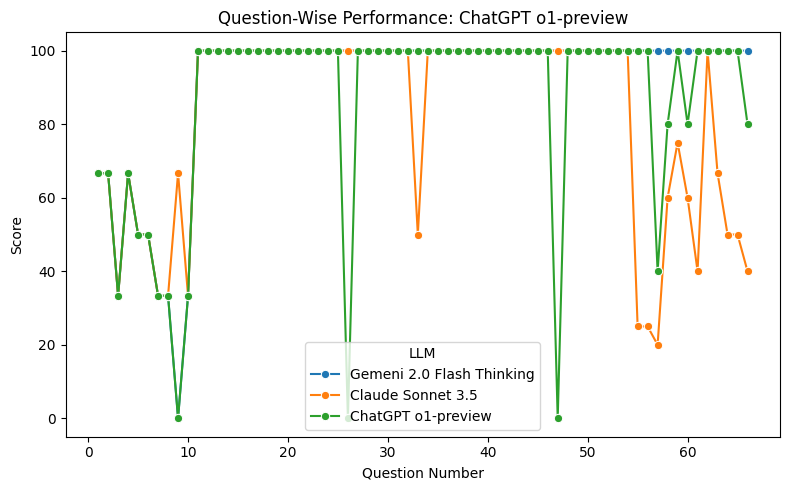

In [75]:
#visualize how each llm did on each exam question by question.  One plot per exam
exams = df_questions["Exam"].unique()

for exam_name in exams:
    df_exam = df_questions[df_questions["Exam"] == exam_name]

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df_exam, x="Question", y="Percent", hue="LLM", marker="o")
    plt.title(f"Question-Wise Performance: {exam_name}")
    plt.xlabel("Question Number")
    plt.ylabel("Score")
    plt.legend(title="LLM")
    plt.tight_layout()
    plt.show()

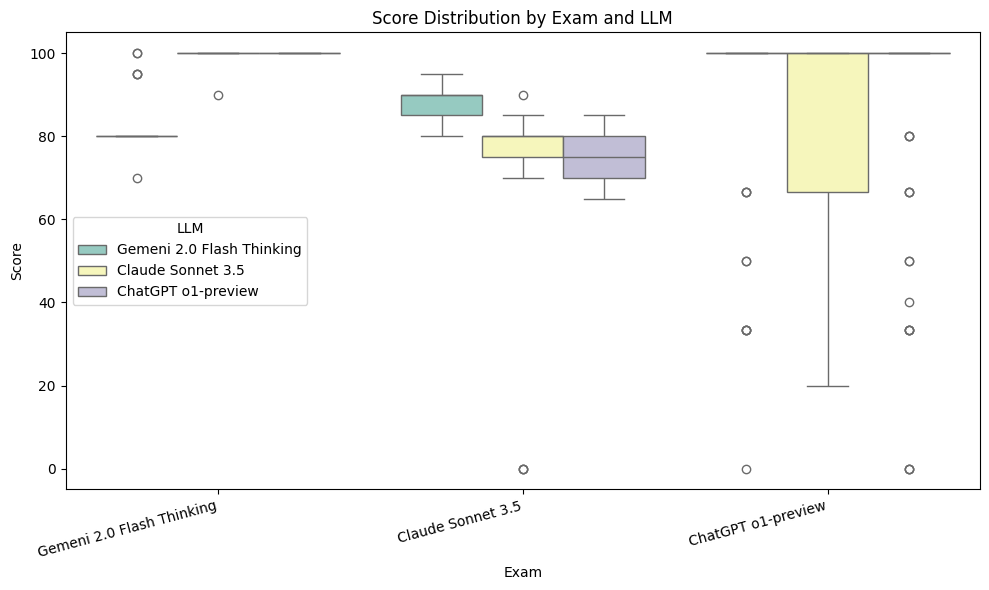

In [76]:
#view a boxplot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_questions, x="Exam", y="Percent", hue="LLM", palette="Set3")
plt.title("Score Distribution by Exam and LLM")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.xticks(rotation=15, ha='right')
plt.legend(title="LLM")
plt.tight_layout()
plt.show()

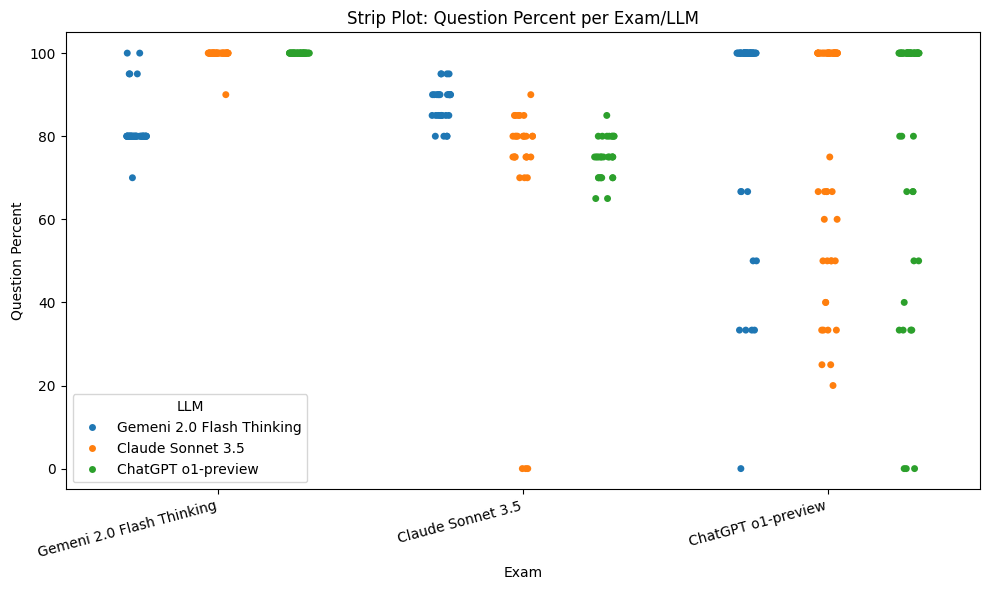

In [77]:
#view a strip plot showing each llm's result on each exam by question
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_questions, x="Exam", y="Percent", hue="LLM", dodge=True)
plt.title("Strip Plot: Question Percent per Exam/LLM")
plt.xlabel("Exam")
plt.ylabel("Question Percent")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

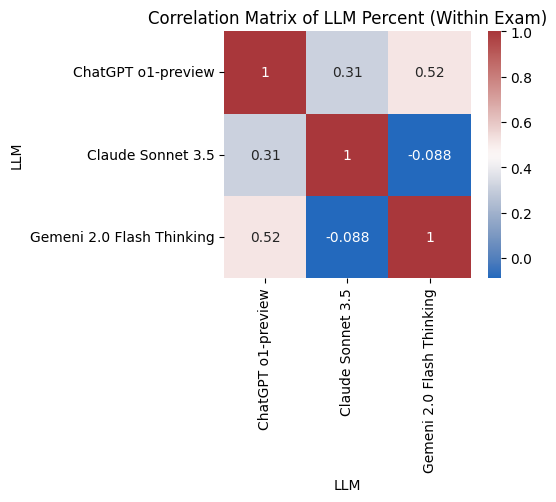

In [78]:
#Heatmap showing the correlation between the performance of the LLMs
df_pivot = df_questions.pivot_table(index="Question", columns="LLM", values="Percent")
corr_matrix = df_pivot.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="vlag", square=True)
plt.title("Correlation Matrix of LLM Percent (Within Exam)")
plt.tight_layout()
plt.show()

<h2>Totals</h2>

In [79]:
#Add a run column to the question level dataframes from each run
df_questions_1["Run"] = 1
df_questions_2["Run"] = 2
df_questions_3["Run"] = 3
df_questions_4["Run"] = 4
df_questions_5["Run"] = 5

#Make a dataframe that contains the results from each run
df_runs_questions = pd.concat([df_questions_1,
                               df_questions_2,
                               df_questions_3,
                               df_questions_4,
                               df_questions_5], ignore_index=True)

In [90]:
#Examine the dataframe
df_runs_questions.head()

,LLM,Exam,Question,Score,Percent,Run
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,1,5.0,100.0,1
1,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,2,5.0,100.0,1
2,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,3,5.0,100.0,1
3,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,4,5.0,100.0,1
4,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,5,5.0,100.0,1


In [98]:
#Add a run column to the exam level dataframes from each run
df_totals_1["Run"] = 1
df_totals_2["Run"] = 2
df_totals_3["Run"] = 3
df_totals_4["Run"] = 4
df_totals_5["Run"] = 5

#Make a dataframe that contains the results from each run
df_runs_totals = pd.concat([df_totals_1,
                            df_totals_2,
                            df_totals_3,
                            df_totals_4,
                            df_totals_5], ignore_index=True)

In [99]:
#Examine the dataframe
df_runs_totals.head()

,LLM,Exam,TotalScore,OverallPercent,Run
0,Gemeni 2.0 Flash Thinking,Gemeni 2.0 Flash Thinking,180.0,97.297297,1
1,Gemeni 2.0 Flash Thinking,Claude Sonnet 3.5,968.0,80.666667,1
2,Gemeni 2.0 Flash Thinking,ChatGPT o1-preview,37.0,56.060606,1
3,Claude Sonnet 3.5,Gemeni 2.0 Flash Thinking,180.0,97.297297,1
4,Claude Sonnet 3.5,Claude Sonnet 3.5,921.0,76.750000,1


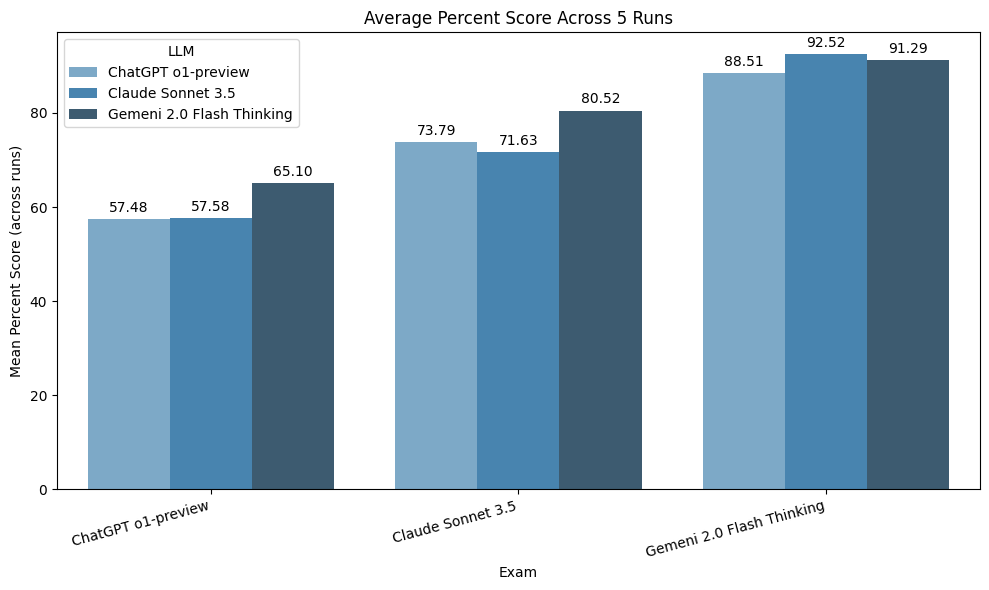

In [ ]:
#Plot showing each LLM's average score on each Exam
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_agg, x="Exam", y="mean_score", hue="LLM",
                 palette="Blues_d", capsize=.2)

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

#Show the plot
plt.title("Average Percent Score Across 5 Runs")
plt.ylabel("Mean Percent Score (across runs)")
plt.xlabel("Exam")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

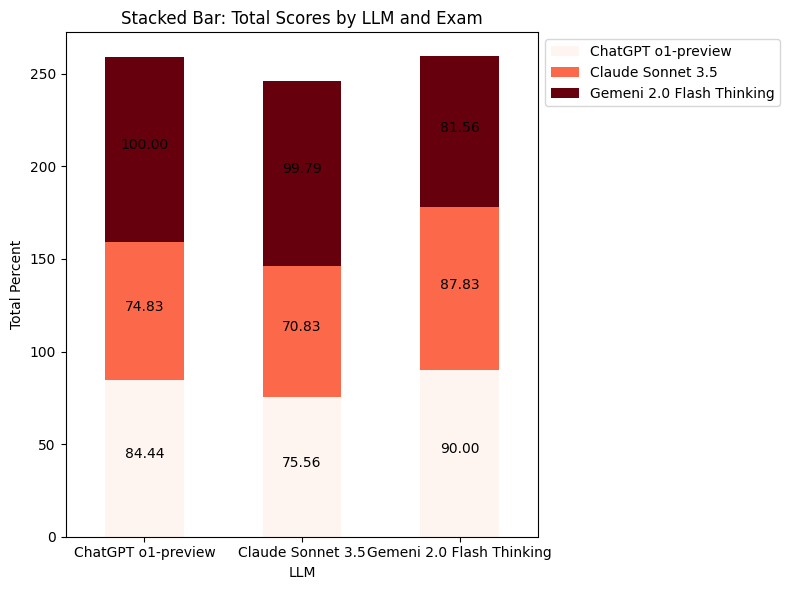

In [ ]:
#Stacked bar plot showing each LLM's average score on each exam
pivot_df = df_totals.pivot(index='LLM', columns='Exam', values='OverallPercent')

# Create a stacked bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Reds')

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', padding=3)

#Move the legend to not block things
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

#show the plot
plt.title("Stacked Bar: Total Scores by LLM and Exam")
plt.ylabel("Total Percent")
plt.xlabel("LLM")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

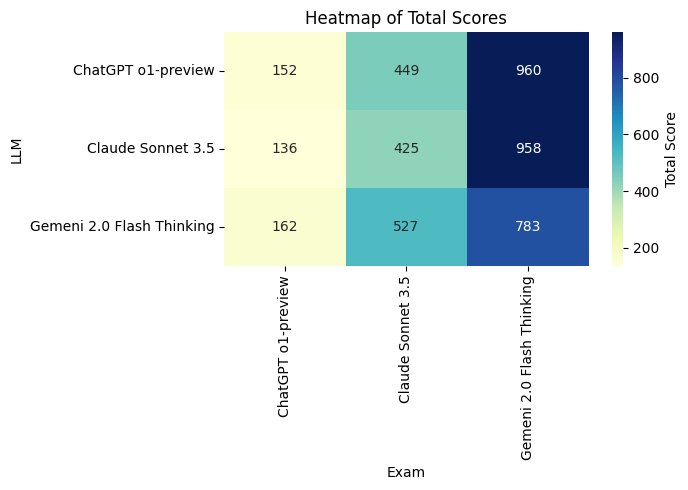

In [109]:
#Create pivot for heatmap
pivot_heat = df_totals.pivot(index='LLM', columns='Exam', values='TotalScore')

#Heatmap showing how each LLM did on each exam
plt.figure(figsize=(7,5))
sns.heatmap(pivot_heat, annot=True, cmap='YlGnBu', fmt=".0f",
            cbar_kws={'label': 'Total Score'})
plt.title("Heatmap of Total Scores")
plt.ylabel("LLM")
plt.xlabel("Exam")
plt.tight_layout()
plt.show()

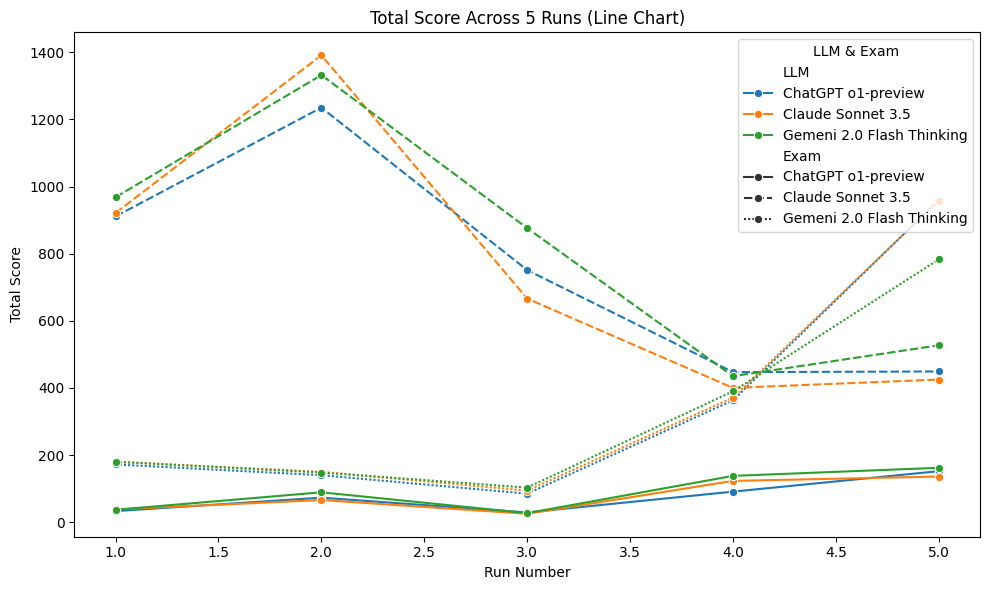

In [85]:
#get total scores for exam by run
df_runs_totals = (
    df_runs_questions.groupby(["LLM", "Exam", "Run"], as_index=False)
    .agg({"Score": "sum"})
)

#Line plot showing LLM results by exam run by run
plt.figure(figsize=(10,6))
sns.lineplot(data=df_runs_totals, x="Run", y="Score", hue="LLM", style="Exam", marker="o")
plt.title("Total Score Across 5 Runs (Line Chart)")
plt.xlabel("Run Number")
plt.ylabel("Total Score")
plt.legend(title="LLM & Exam")
plt.tight_layout()
plt.show()

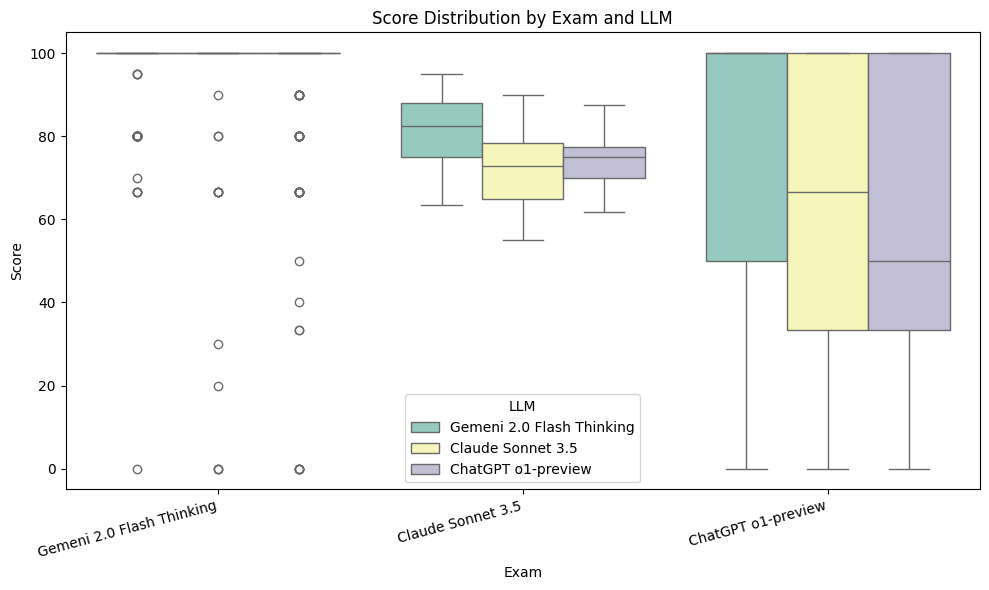

In [110]:
#Box plot showing LLM score for each exam by question for all 5 runs
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_runs_questions, x="Exam", y="Percent", hue="LLM", palette="Set3")
plt.title("Score Distribution by Exam and LLM")
plt.xlabel("Exam")
plt.ylabel("Score")
plt.xticks(rotation=15, ha='right')
plt.legend(title="LLM")
plt.tight_layout()
plt.show()

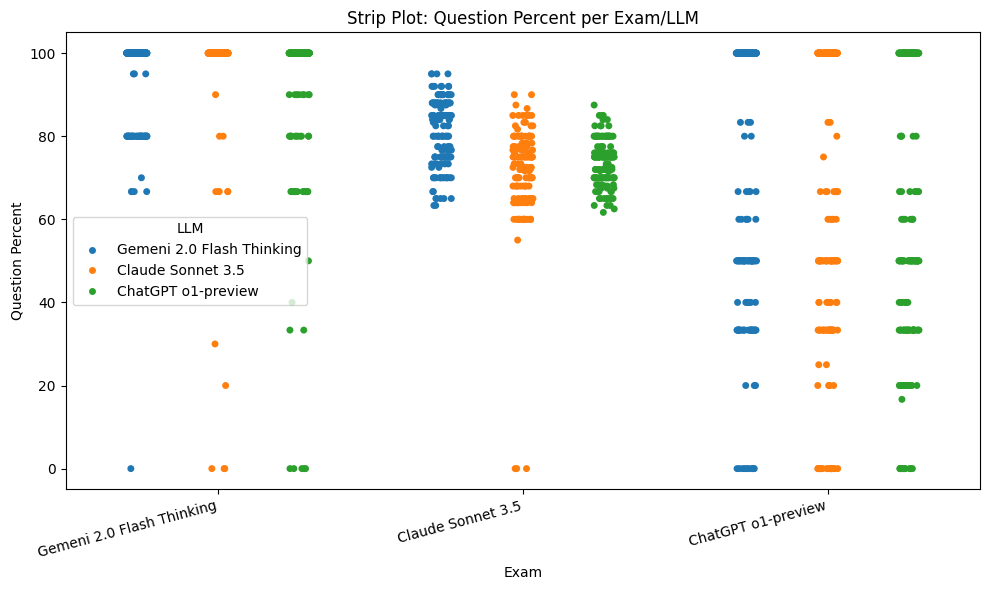

In [111]:
#Strip plot showing LLM score for each exam by question for all 5 runs
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_runs_questions, x="Exam", y="Percent", hue="LLM", dodge=True)
plt.title("Strip Plot: Question Percent per Exam/LLM")
plt.xlabel("Exam")
plt.ylabel("Question Percent")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()